In [1]:
import numpy as np
import scipy
from PIL import Image
from scipy import fftpack
import scipy.fftpack

In [2]:
from PIL import Image, ImageFilter
try:
    ANTIALIAS = Image.Resampling.LANCZOS
except AttributeError:
    ANTIALIAS = Image.ANTIALIAS

# Perceptrual hashing

In [3]:
def phash(image, hash_size=8, highfreq_factor=4):
    import scipy.fftpack
    img_size = hash_size * highfreq_factor
    image = image.convert('L').resize((img_size, img_size), ANTIALIAS)
    pixels = numpy.asarray(image)
    dct = scipy.fftpack.dct(scipy.fftpack.dct(pixels, axis=0), axis=1)
    dctlowfreq = dct[:hash_size, :hash_size]
    med = numpy.median(dctlowfreq)
    diff = dctlowfreq > med
    return ImageHash(diff)

In [4]:
image = Image.open('./images/logo1.png')

In [8]:
#image

In [9]:
hash_size = 8
highfreq_factor=4
img_size = hash_size * highfreq_factor
image = image.convert('L').resize((img_size, img_size), ANTIALIAS)

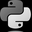

In [10]:
image

In [11]:
pixels = np.asarray(image)
dct = scipy.fftpack.dct(scipy.fftpack.dct(pixels, axis=0),
                        axis=1)

print(pixels)
print('shape image:', pixels.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
shape image: (32, 32)


In [13]:
scipy.fftpack.dct(pixels, axis=0).shape

(32, 32)

In [14]:
scipy.fftpack.dct(scipy.fftpack.dct(pixels, axis=0),
                        axis=1).shape

(32, 32)

In [37]:
dct = scipy.fftpack.dct(scipy.fftpack.dct(pixels, axis=0),
                        axis=1)

In [10]:
dct.shape

(32, 32)

In [11]:
dct.mean(), dct.max(), dct.sum()

(146.18667350764204, 375096.0, 149695.15367182545)

In [12]:
dct

array([[ 3.75096000e+05, -1.52617593e+04, -1.05989169e+05, ...,
         4.65561166e+03,  1.36677329e+03,  3.41341903e+03],
       [-1.51843527e+03, -7.59554333e+03,  2.89126502e+04, ...,
        -3.36232586e+02, -1.94454896e+03, -4.45915551e+01],
       [-1.33936121e+05,  2.05412271e+04, -1.95056293e+04, ...,
        -5.72255021e+02, -1.25484366e+03, -8.05389887e+02],
       ...,
       [-1.89624943e+03, -5.88628667e+01,  2.29353677e+02, ...,
        -2.78752465e+02, -4.06513391e+02,  1.93393534e+02],
       [-4.78401011e+03,  1.13939280e+03,  1.19998726e+03, ...,
         3.21611692e+02,  4.18123789e+02,  4.32601041e+02],
       [ 1.67329156e+03, -2.09623828e+03,  6.26572353e+02, ...,
         5.18953425e+01,  4.48505268e+02, -3.01139650e+02]])

In [13]:
dctlowfreq = dct[:hash_size, :hash_size]

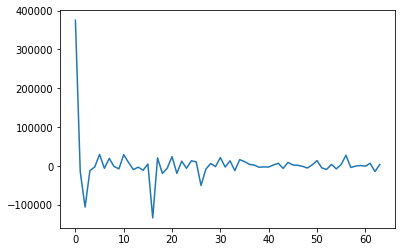

In [14]:
# We can see that the first term is quite big
# Most implementations remove it from the procedure
import matplotlib.pyplot as plt
plt.plot(dctlowfreq.ravel())

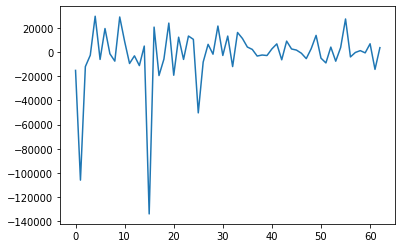

In [15]:
plt.plot(dctlowfreq.ravel()[1:])

In [16]:
dctlowfreq.shape

(8, 8)

In [36]:
import numpy as np
np.median([1,2,100,5])

3.5

In [32]:
med = np.median(dctlowfreq)
diff = dctlowfreq > med
diff

array([[ True, False, False, False, False,  True, False,  True],
       [False, False,  True,  True, False, False, False,  True],
       [False,  True, False, False,  True, False,  True, False],
       [ True,  True, False, False,  True, False,  True, False],
       [ True, False,  True,  True,  True,  True, False, False],
       [False,  True,  True, False,  True,  True,  True, False],
       [False,  True,  True, False, False,  True, False,  True],
       [ True, False,  True,  True, False,  True, False,  True]])

In [19]:
scipy.fftpack.dct(pixels)

array([[ 2.14400000e+03,  1.65155802e+02, -1.79258891e+03, ...,
         2.07009487e+00, -1.17719381e+01,  1.73517406e+01],
       [ 3.12000000e+03,  2.85229068e+02, -2.26805346e+03, ...,
        -3.05063319e+01,  6.59944155e+00, -3.38802751e+01],
       [ 2.92000000e+03,  8.72601338e+01, -2.02401213e+03, ...,
         6.78784517e+01,  5.24008740e+01,  1.57239813e+01],
       ...,
       [ 1.40000000e+01,  1.67940633e+00, -5.09211586e+00, ...,
         3.16585424e-02, -1.76960841e+00,  1.68346577e+00],
       [ 6.52000000e+02,  2.95664856e+01, -5.78066140e+02, ...,
         1.49428214e+00, -2.67649692e+00,  3.21048875e+00],
       [ 3.95600000e+03,  1.69652549e+02, -2.89079338e+03, ...,
         2.35846538e+01,  1.46445421e+00,  1.96836250e+01]])

#  dct equivalent in Julia

In [20]:
scipy.fftpack.dct([1,2,3], norm='ortho')

array([ 3.46410162, -1.41421356,  0.        ])

In [21]:
scipy.fftpack.dct([1,2,3])

array([ 1.20000000e+01, -3.46410162e+00, -4.44089210e-16])

In [22]:
scipy.fftpack.dct([1,2,3], axis=0)

array([ 1.20000000e+01, -3.46410162e+00, -4.44089210e-16])

In [26]:
#?scipy.fftpack.dct

In [27]:
scipy.fftpack.dct([1,2,3], axis=0)

array([ 1.20000000e+01, -3.46410162e+00, -4.44089210e-16])

In [28]:
scipy.fftpack.dct(np.array([1,2,3]))

array([ 1.20000000e+01, -3.46410162e+00, -4.44089210e-16])

In [49]:
X = np.array([[1,2,3],[4,5,6],[7, 8, 9]]).T
X

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [50]:
scipy.fftpack.dct(X, axis=0)

array([[ 1.20000000e+01,  3.00000000e+01,  4.80000000e+01],
       [-3.46410162e+00, -3.46410162e+00, -3.46410162e+00],
       [-4.44089210e-16, -4.44089210e-16, -4.44089210e-16]])

In [51]:
scipy.fftpack.dct(X, axis=1)

array([[ 24.        , -10.39230485,   0.        ],
       [ 30.        , -10.39230485,   0.        ],
       [ 36.        , -10.39230485,   0.        ]])

In [48]:
scipy.fftpack.dct([1,2,3], norm='ortho')

array([ 3.46410162, -1.41421356,  0.        ])